In [4]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
from scipy import stats
from sklearn import metrics

In [7]:
data = pd.read_csv("data.csv")

In [9]:
data.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


# Data Cleansing

In [13]:
data = data[pd.notnull(data['Payroll Department'])]
data.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
data.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
data.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)

In [15]:
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    data[i] = data[i].str.replace('$','')

<ipython-input-15-d6eba56da4eb>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data[i] = data[i].str.replace('$','')


# Outlier removal

In [16]:
data = data[data.Annual_sal != 0]  
data = data[data.Base_Pay != 0]
data.Annual_sal = data.Annual_sal.astype(float)
data.Base_Pay = data.Base_Pay.astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_sal', ylabel='Density'>

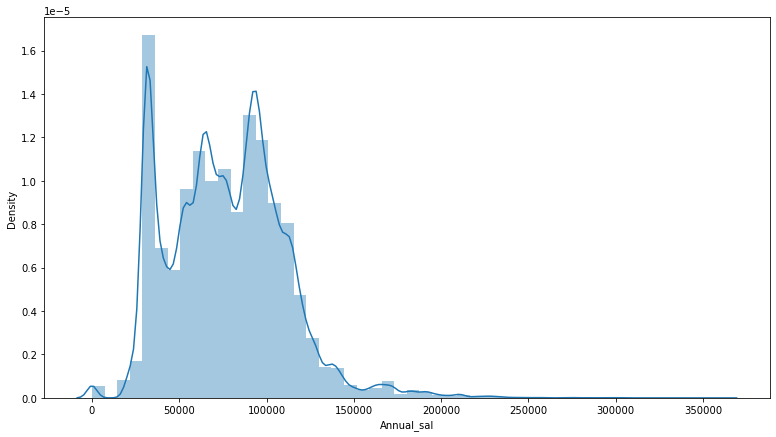

In [37]:
plt.figure(figsize = (13,7))
sns.distplot(data.Annual_sal)

# Creating different Sample from the population

In [25]:
payroll_2015 = data[data.Year ==2015]
payroll_2016 = data[data.Year ==2016]

# Calculating the Population Parameters

In [26]:
pop_mean_2015 = payroll_2015['Annual_sal'].mean()
pop_std_2015 = statistics.stdev(payroll_2015.Annual_sal)
print("Population Mean: "+str(pop_mean_2015))
print("Population Standard Deviation: "+str(pop_std_2015))

Population Mean: 76046.39152505301
Population Standard Deviation: 34232.25489729045


# Calculating the Sample Parameters

In [22]:
print("Population Mean: "+str(payroll_2016['Annual_sal'].mean()))
payroll_2016_sample = payroll_2016.sample(frac=0.10)
sample_mean_2016 = payroll_2016_sample['Annual_sal'].mean()
print("Sample Mean: "+str(sample_mean_2016))
sample_std_2016 = statistics.stdev(payroll_2016_sample.Annual_sal)
print("Sample Standard Deviation: "+str(sample_std_2016))

Population Mean: 78711.19987225177
Sample Mean: 78692.03696322713
Sample Standard Deviation: 33505.24227062209


# Hypothesis Testing

In [28]:
import math
zscore_critical = 1.65  
zscore_test_stat = ((sample_mean_2016 - pop_mean_2015)*math.sqrt(8916))/sample_std_2016
print(zscore_test_stat)

7.455965815263048


In [29]:
pop_mean_2016 = payroll_2016['Annual_sal'].mean()
pop_std_2016 = statistics.stdev(payroll_2016.Annual_sal)

zscore_error = ((pop_mean_2016 - pop_mean_2015)/pop_std_2016)
print(zscore_error)

0.07937359898019851


# F Distribution and ANOVA

In [35]:
payroll_2015_elec = payroll_2015[payroll_2015.Job_title == 'Electrician']
payroll_2016_elec = payroll_2016[payroll_2016.Job_title == 'Electrician']
sample_elec_2015 = payroll_2015_elec.sample(frac=0.41)
sample_elec_mean_2015 = sample_elec_2015['Base_Pay'].mean()
print("Sample Mean 2015 "+str(sample_elec_mean_2015))
sample_elec_2016 = payroll_2016_elec.sample(frac=0.22)
sample_elec_mean_2016 = sample_elec_2016['Base_Pay'].mean()
print("Sample_Mean_2016= "+str(sample_elec_mean_2016))
sam_1 = sample_elec_2015.Base_Pay
sam_2 = sample_elec_2016.Base_Pay

Sample Mean 2015 70940.66028571427
Sample_Mean_2016= 30418.422571428568


# Calculating the test statistics

In [36]:
f, p = stats.f_oneway(sam_1, sam_2)
print ('F value:', f)
print ('P value:', p, '\n')

F value: 80.10212410020618
P value: 4.155720546917307e-13 

